# Elastic Net Regression #

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Considering Diamond dataset for Elastic Net Regression

diamond_df = pd.read_csv("datasets/datasets/diamond.csv")

In [3]:
# Looking at the structure of the data - number of columns, rows, name of columns

diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

By Looking at the names of the columns, column : 'Unnamed: 0' can be dropped from the dataset as it represents the row number, we will do this in the preprocessing steps

In [5]:
diamond_df.shape

(53940, 11)

In [6]:
# Looking at the description of the dataset.

diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Removing 'Unnamed: 0' column from the dataset

diamond_df = diamond_df.drop("Unnamed: 0", axis = 1)
diamond_df.shape

(53940, 10)

In [8]:
# Finding out if there are any duplicates

duplicates_diamond = diamond_df[diamond_df.duplicated()]

In [9]:
duplicates_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [10]:
# As there are duplicates in the dataset, we can exclude these from the dataset, as it will effect the model.

diamond_df = diamond_df[~diamond_df.duplicated()]

In [11]:
diamond_df.shape

(53794, 10)

In [12]:
# Finding the NaN values

diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [13]:
# As there are no NaN values, we can start encoding the numerical values to categorical variables

diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
diamond_df = diamond_df.drop("depth", axis = 1)

In [15]:
def min_max_normalization(col):
    min_val = min(col)
    max_val = max(col)
    return [((val - min_val)/(max_val - min_val)) for val in col]

In [16]:
# Applying the min-max normalization function on the numerical values

diamond_df['carat'] = min_max_normalization(diamond_df['carat'])

diamond_df['table'] = min_max_normalization(diamond_df['table'])

diamond_df['x'] = min_max_normalization(diamond_df['x'])

diamond_df['y'] = min_max_normalization(diamond_df['y'])

diamond_df['z'] = min_max_normalization(diamond_df['z'])

diamond_df['price'] = min_max_normalization(diamond_df['price'])

diamond_df.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.288462,0.000487,0.404097,0.073854,0.086478


In [17]:
# Encoding the categorical variables to numerical variables by performing one-hot encoding

diamond_df = pd.get_dummies(diamond_df, drop_first = True)

diamond_df.head()

,carat,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.230769,0.000000,0.367784,0.067572,0.076415,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.002079,0.346154,0.000000,0.362197,0.065195,0.072642,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.006237,0.423077,0.000054,0.377095,0.069100,0.072642,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.018711,0.288462,0.000433,0.391061,0.071817,0.082704,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.022869,0.288462,0.000487,0.404097,0.073854,0.086478,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [18]:
# Choosing X and y

x = diamond_df.drop("price", axis = 1)
y = diamond_df['price']

In [19]:
# Splitting the dataset into training and testing as 80% training and 20% testing

# Setting the split ratio value to 0.8
split_ratio = 0.8
 
x_train = x[: int(split_ratio*len(diamond_df))]
x_test =  x[int(split_ratio*len(diamond_df)):]
y_train = y[:int(split_ratio*len(diamond_df))]
y_test = y[int(split_ratio*len(diamond_df)):]

In [20]:
# Printing the shape of x_train, y_train, x_test, y_test

print("The shape of x_train, y_train, y_train, y_test is ", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

The shape of x_train, y_train, y_train, y_test is  (43035, 22) (43035,) (10759, 22) (10759,)


In [21]:
def calculate_weights_elastic(x_train, y_train, alpha, lambda_ratio):
    # Find the x_train transpose using .T method
    x_transpose = x_train.T

    # Find the dot product of x_transpose and x_train
    x_dot_transpose = np.dot(x_transpose, x_train)

    # Find the inverse value of the x_dot_transpose using np.linalg.inv() method
    x_inverse = np.linalg.inv(x_dot_transpose)

    # Finding the dot product of x_transpose and x_inverse
    x_transpose_inverse = np.dot(x_inverse, x_transpose)

    # Finally finding the weights by performing dot product with y_train
    w_without_norm = np.dot(x_transpose_inverse, y_train)

    l1_penalty = alpha*lambda_ratio

    l2_penalty = alpha*(lambda_ratio/2)

    l1_norm = l1_penalty*(np.sign(w_without_norm))

    l2_norm = l2_penalty*(w_without_norm)

    weights_elastic = lambda_ratio*w_without_norm + l1_norm + l2_norm
    
    bias = weights_elastic[0]
    
    return weights_elastic,bias

In [23]:
# Assume the lambda value which is a mix of lambda1 and lambda2
lambda_ratio = 0.5

alpha = 0.01

weights_elastic, bias = calculate_weights_elastic(x_train, y_train, alpha, lambda_ratio)

print("The weights calculated using elastic net regression is", weights_elastic)

The weights calculated using elastic net regression is [ 1.5307278  -0.0730257  -0.22434071  0.13192788 -0.72612936  0.02076108
  0.02783174  0.02643381  0.02558825 -0.01238901 -0.01381494 -0.02029293
 -0.03612412 -0.05038181 -0.07857725  0.15542737  0.10752998  0.07883633
  0.1350904   0.12644682  0.14565971  0.14554727]


In [24]:
# Calculating the predicted value for elastic net regression

y_pred_elastic = x_test.dot(weights_elastic.T)

In [25]:
y_pred_elastic

43168    0.036151
43169    0.034219
43170    0.032603
43171    0.029294
43172    0.060742
           ...   
53935    0.094059
53936    0.088516
53937    0.081568
53938    0.057963
53939    0.073100
Length: 10759, dtype: float64

In [28]:
# Finding the squared loss using elastic net regression

def calculate_squared_loss(y_test, y_pred, weights, lambda_ratio, alpha):
    # Calculating the regularization term

    sum_of_squared_errors = np.sum((y_test - y_pred)**2)

    sum_of_abs_weights = np.sum(weights)

    l1_reg_term = lambda_ratio*(alpha*(sum_of_abs_weights))

    l2_reg_term = lambda_ratio*(1-alpha*(sum_of_squared_errors))

    squared_loss_elastic = (sum_of_squared_errors)/2 + l1_reg_term + l2_reg_term
    
    return squared_loss_elastic

In [30]:
squared_loss_elastic = calculate_squared_loss(y_test, y_pred_elastic, weights_elastic, lambda_ratio, alpha)

print("The squared loss for diamond dataset using Elastic Net Regression is", squared_loss_elastic)

The squared loss for diamond dataset using Elastic Net Regression is 8.811309276264895


In [31]:
# Finding the MSE value

def calculate_mse(y_test, y_pred):
    return np.mean((y_test - y_pred)**2)

In [32]:
mse_elastic = calculate_mse(y_test, y_pred_elastic)

In [34]:
print("The mean squared loss for elastic net regression is", mse_elastic)

The mean squared loss for elastic net regression is 0.0015592669164395754


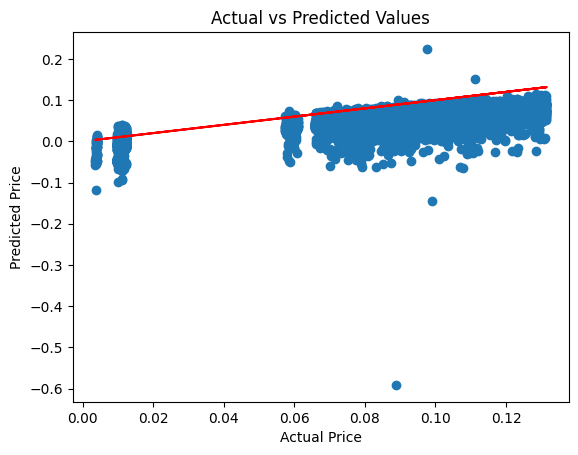

In [35]:
import matplotlib.pyplot as plt

# Plotting the graph for actual values vs predicted values

# Scatter plot for actual and predicted value
plt.scatter(y_test, y_pred_elastic)

# Adding the line in red color
plt.plot(y_test, y_test, color='red')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.title('Actual vs Predicted Values')
plt.show()

In [36]:
# Pickled file which consists of the final best weights for Ridge Regression

# Importing pickle library
import pickle

# Opening the pickle file with 'write binary mode'

with open("notebook_2_part4.pkl", "wb") as f:
    pickle.dump(weights_elastic, f)